<a href="https://colab.research.google.com/github/Aswinramesh04/Feynn-Lab/blob/main/E2W.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import warnings

import numpy as np
import re

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import plotly.express as px
from sklearn.cluster import KMeans

In [2]:
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
df = pd.read_csv("/content/bike.csv")

In [4]:
df.head()

,review,Used it for,Owned for,Ridden for,rating,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,Comfort,Maintenance cost,Value for Money
0,Wanna buy this bike so i gave basic informatio...,Everything,Never owned,NaN,1,3.0,1.0,3.0,1.0,4.0,NaN,NaN,NaN
1,This is simply amazing and exceptionally well ...,Everything,> 1 yr,< 5000 kms,5,5.0,5.0,5.0,5.0,NaN,5.0,NaN,NaN
2,"Battery life is good, I like this bike very mu...",Everything,< 3 months,< 5000 kms,5,4.0,4.0,5.0,3.0,NaN,4.0,NaN,NaN
3,I seen this bike on road. Very nice bike and g...,Everything,Never owned,NaN,5,5.0,5.0,5.0,5.0,NaN,5.0,NaN,NaN
4,I have a rv400 I have the bike for almost more...,Daily Commute,> 1 yr,5000-10000 kms,1,2.0,1.0,1.0,2.0,NaN,3.0,NaN,NaN


In [5]:
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812 entries, 0 to 811
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   review              769 non-null    object 
 1   Used it for         812 non-null    object 
 2   Owned for           812 non-null    object 
 3   Ridden for          640 non-null    object 
 4   rating              812 non-null    int64  
 5   Visual Appeal       711 non-null    float64
 6   Reliability         688 non-null    float64
 7   Performance         624 non-null    float64
 8   Service Experience  681 non-null    float64
 9   Extra Features      568 non-null    float64
 10  Comfort             202 non-null    float64
 11  Maintenance cost    88 non-null     float64
 12  Value for Money     84 non-null     float64
dtypes: float64(8), int64(1), object(4)
memory usage: 82.6+ KB


In [7]:
df.head(10)

,review,Used it for,Owned for,Ridden for,rating,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,Comfort,Maintenance cost,Value for Money
0,Wanna buy this bike so i gave basic informatio...,Everything,Never owned,NaN,1,3.0,1.0,3.0,1.0,4.0,NaN,NaN,NaN
1,This is simply amazing and exceptionally well ...,Everything,> 1 yr,< 5000 kms,5,5.0,5.0,5.0,5.0,NaN,5.0,NaN,NaN
2,"Battery life is good, I like this bike very mu...",Everything,< 3 months,< 5000 kms,5,4.0,4.0,5.0,3.0,NaN,4.0,NaN,NaN
3,I seen this bike on road. Very nice bike and g...,Everything,Never owned,NaN,5,5.0,5.0,5.0,5.0,NaN,5.0,NaN,NaN
4,I have a rv400 I have the bike for almost more...,Daily Commute,> 1 yr,5000-10000 kms,1,2.0,1.0,1.0,2.0,NaN,3.0,NaN,NaN
5,Buying experience of Revolt 400 bike. It is us...,Leisure Rides,> 1 yr,> 15000 kms,3,1.0,5.0,1.0,1.0,NaN,3.0,NaN,NaN
6,"We'll, this bike will meet the interests of ma...",Leisure Rides,Never owned,NaN,5,4.0,4.0,4.0,4.0,4.0,NaN,5.0,NaN
7,"Buying experience is awesome, riding performan...",Daily Commute,6 months-1 yr,< 5000 kms,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Value for money. Really a thumbs up for the bi...,Everything,Never owned,NaN,5,5.0,5.0,5.0,5.0,5.0,NaN,5.0,NaN
9,"Please give protection to the battery, because...",Daily Commute,Never owned,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
for col in df.columns[1:].values:
    print(col,'\n\n' ,df[col].value_counts(), '\n\n\n')

Used it for 

 Daily Commute         581
Everything            154
Occasional Commute     52
Leisure Rides          17
Tours                   8
Name: Used it for, dtype: int64 



Owned for 

 < 3 months            211
> 1 yr                195
Never owned           171
6 months-1 yr         129
3-6 months            105
Occasional Commute      1
Name: Owned for, dtype: int64 



Ridden for 

 < 5000 kms         439
5000-10000 kms     133
> 15000 kms         37
10000-15000 kms     30
Never owned          1
Name: Ridden for, dtype: int64 



rating 

 5    323
1    232
4    146
3     65
2     46
Name: rating, dtype: int64 



Visual Appeal 

 5.0    284
4.0    195
3.0    106
1.0     88
2.0     38
Name: Visual Appeal, dtype: int64 



Reliability 

 5.0    228
1.0    172
4.0    147
3.0     90
2.0     51
Name: Reliability, dtype: int64 



Performance 

 5.0    218
4.0    172
1.0    100
3.0     84
2.0     50
Name: Performance, dtype: int64 



Service Experience 

 5.0    215
1.0    198


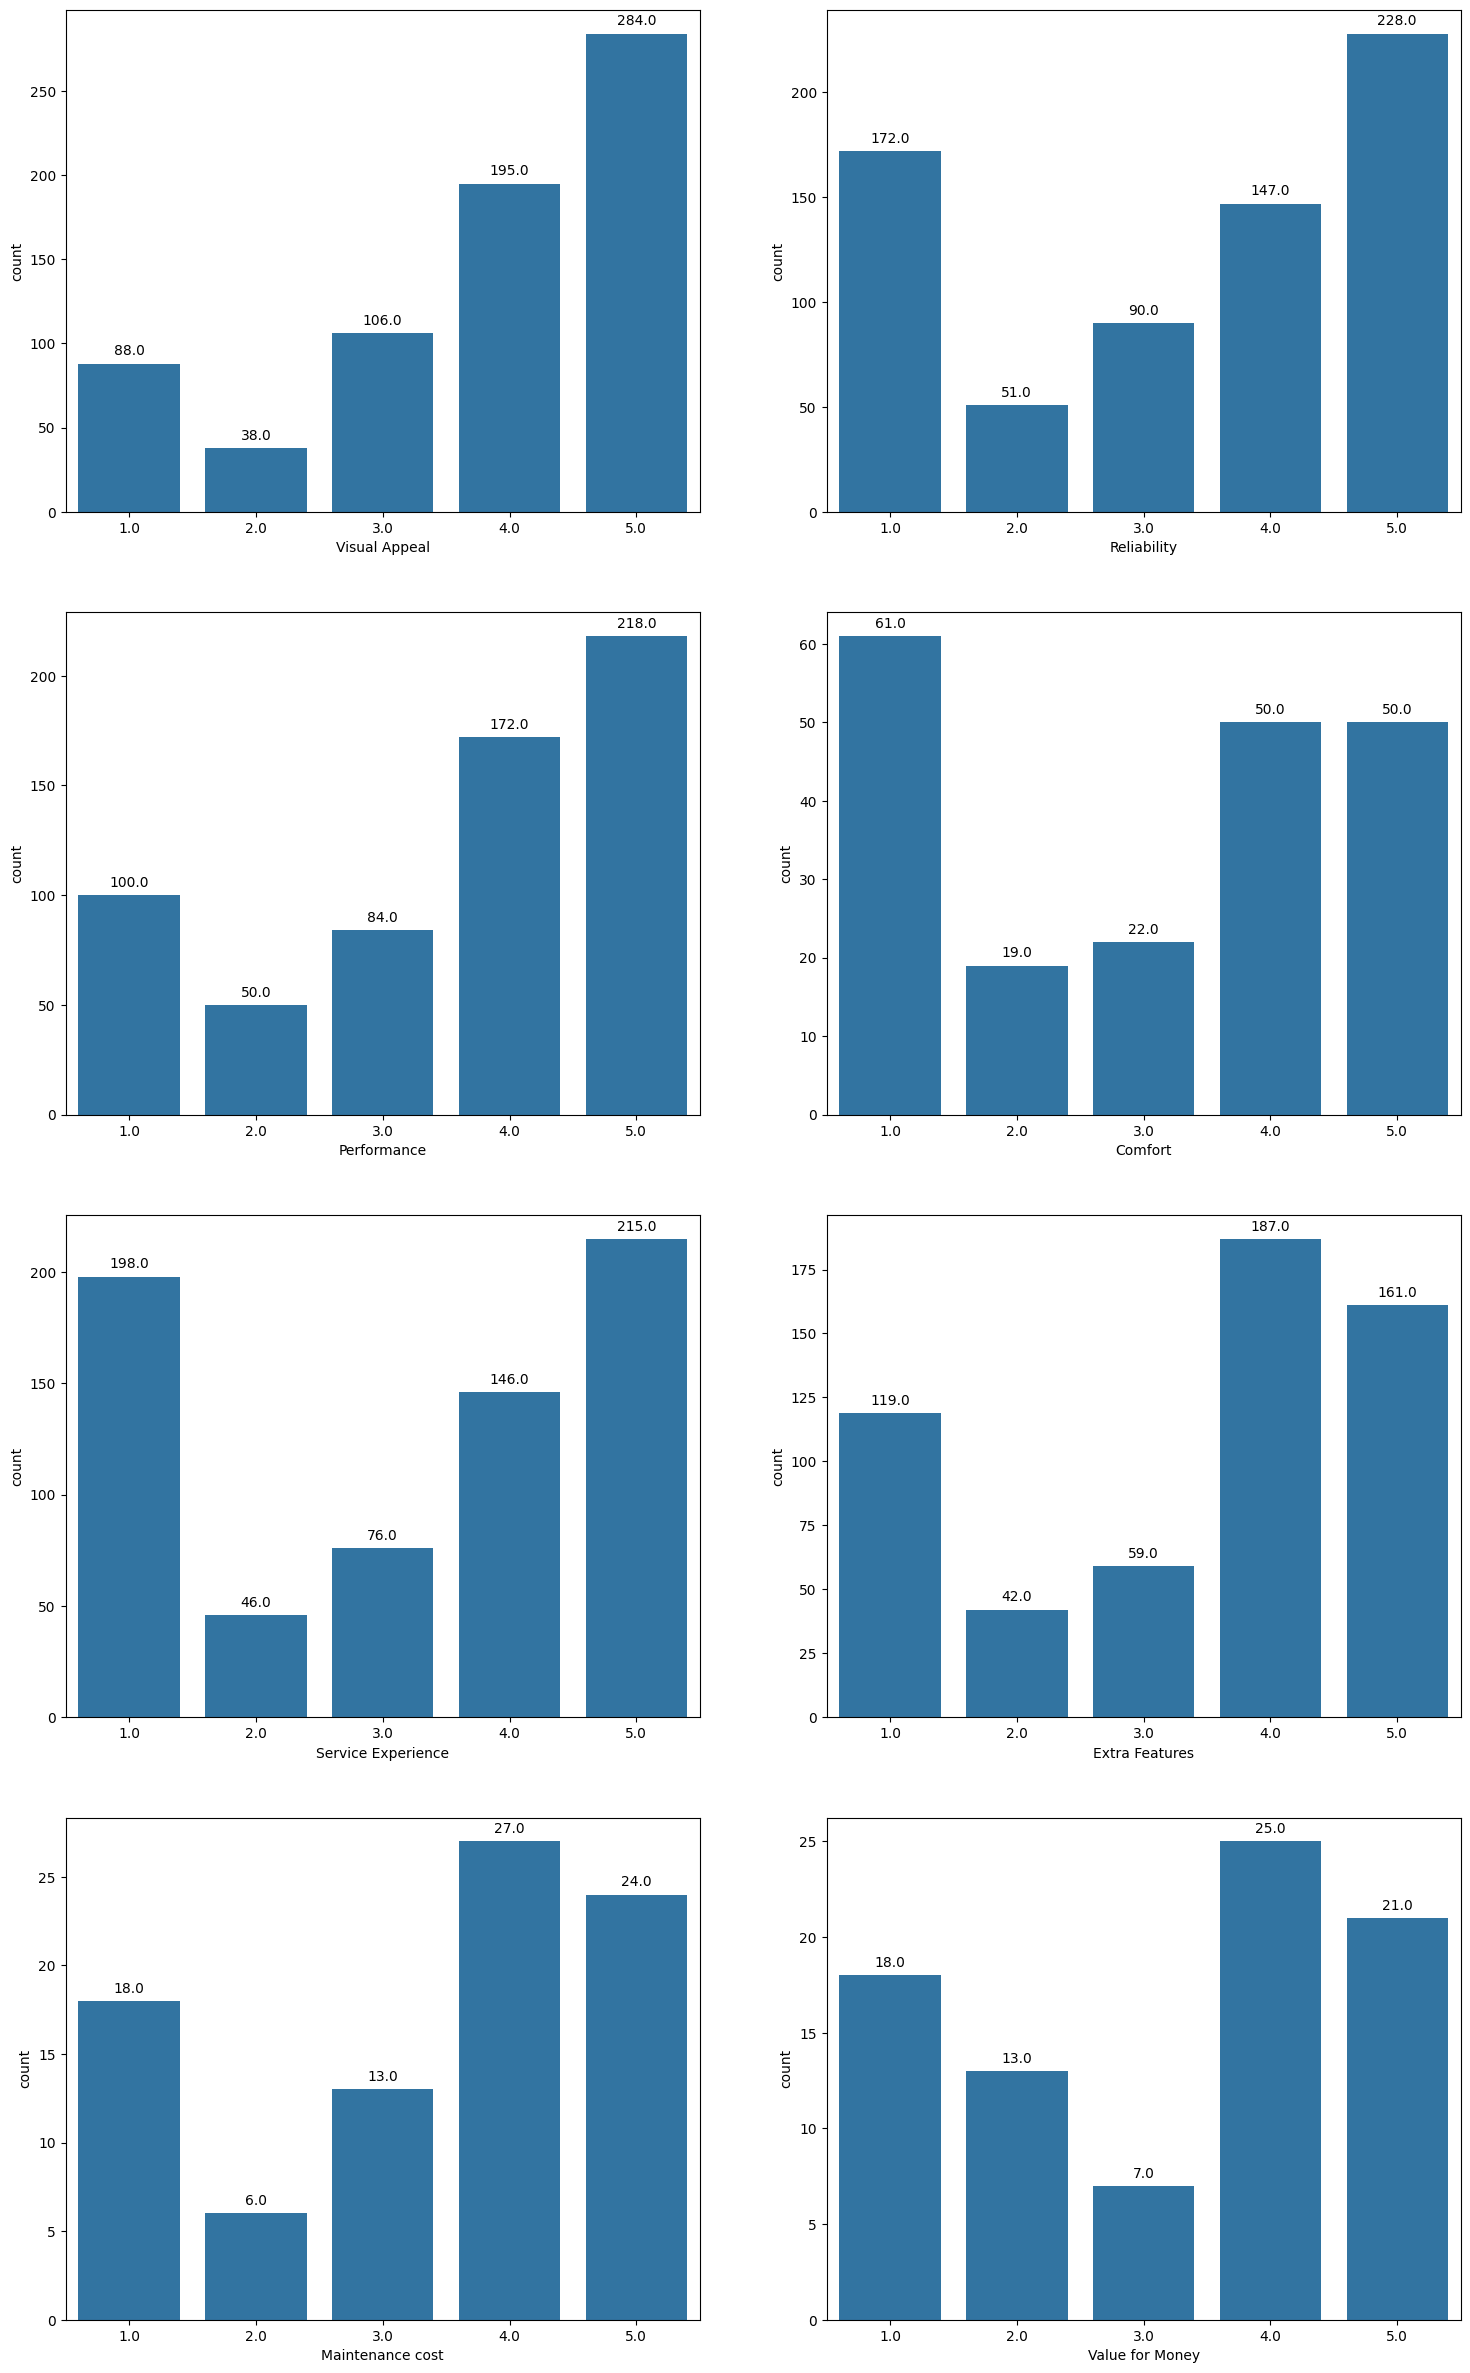

In [9]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(18, 30))

splot = sns.countplot(data = df,x='Visual Appeal', ax=axes[0][0])
for p in splot.patches:
               splot.annotate(format(p.get_height(), '.1f'),
               (p.get_x() + p.get_width() / 2., p.get_height()),
               ha = 'center', va = 'center',
               xytext = (0, 9),
               textcoords = 'offset points')

splot = sns.countplot(data = df,x='Reliability', ax=axes[0][1])
for p in splot.patches:
               splot.annotate(format(p.get_height(), '.1f'),
               (p.get_x() + p.get_width() / 2., p.get_height()),
               ha = 'center', va = 'center',
               xytext = (0, 9),
               textcoords = 'offset points')

splot = sns.countplot(data = df,x='Performance', ax=axes[1][0])
for p in splot.patches:
               splot.annotate(format(p.get_height(), '.1f'),
               (p.get_x() + p.get_width() / 2., p.get_height()),
               ha = 'center', va = 'center',
               xytext = (0, 9),
               textcoords = 'offset points')

splot = sns.countplot(data = df,x='Comfort', ax=axes[1][1])
for p in splot.patches:
               splot.annotate(format(p.get_height(), '.1f'),
               (p.get_x() + p.get_width() / 2., p.get_height()),
               ha = 'center', va = 'center',
               xytext = (0, 9),
               textcoords = 'offset points')

splot = sns.countplot(data = df,x='Service Experience', ax=axes[2][0])
for p in splot.patches:
               splot.annotate(format(p.get_height(), '.1f'),
               (p.get_x() + p.get_width() / 2., p.get_height()),
               ha = 'center', va = 'center',
               xytext = (0, 9),
               textcoords = 'offset points')

splot = sns.countplot(data = df,x='Extra Features', ax=axes[2][1])
for p in splot.patches:
               splot.annotate(format(p.get_height(), '.1f'),
               (p.get_x() + p.get_width() / 2., p.get_height()),
               ha = 'center', va = 'center',
               xytext = (0, 9),
               textcoords = 'offset points')

splot = sns.countplot(data = df,x='Maintenance cost', ax=axes[3][0])
for p in splot.patches:
               splot.annotate(format(p.get_height(), '.1f'),
               (p.get_x() + p.get_width() / 2., p.get_height()),
               ha = 'center', va = 'center',
               xytext = (0, 9),
               textcoords = 'offset points')

splot = sns.countplot(data = df,x='Value for Money', ax=axes[3][1])
for p in splot.patches:
               splot.annotate(format(p.get_height(), '.1f'),
               (p.get_x() + p.get_width() / 2., p.get_height()),
               ha = 'center', va = 'center',
               xytext = (0, 9),
               textcoords = 'offset points')

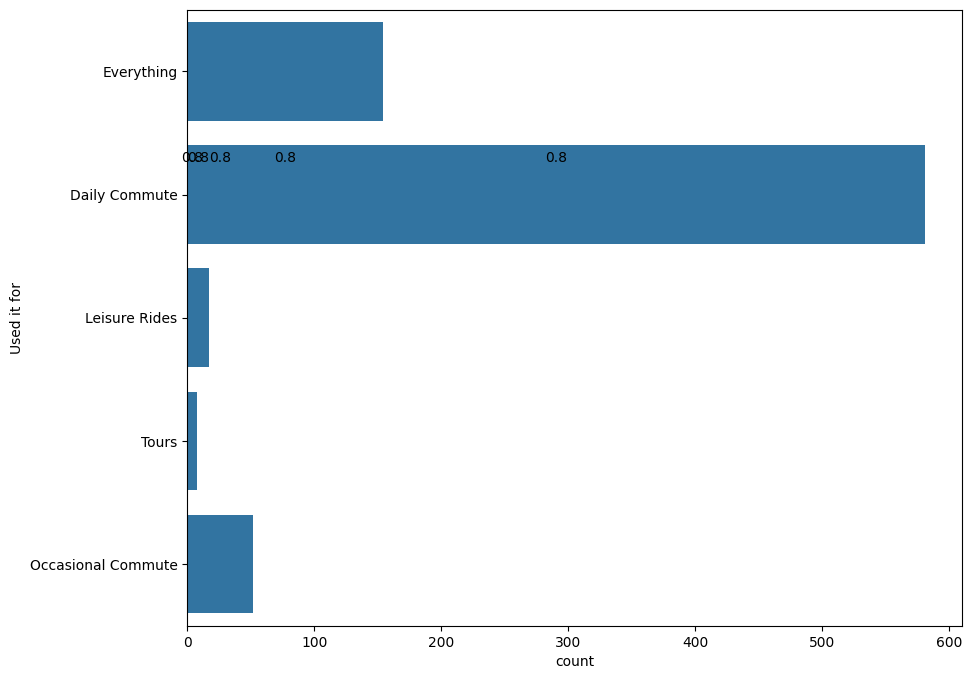

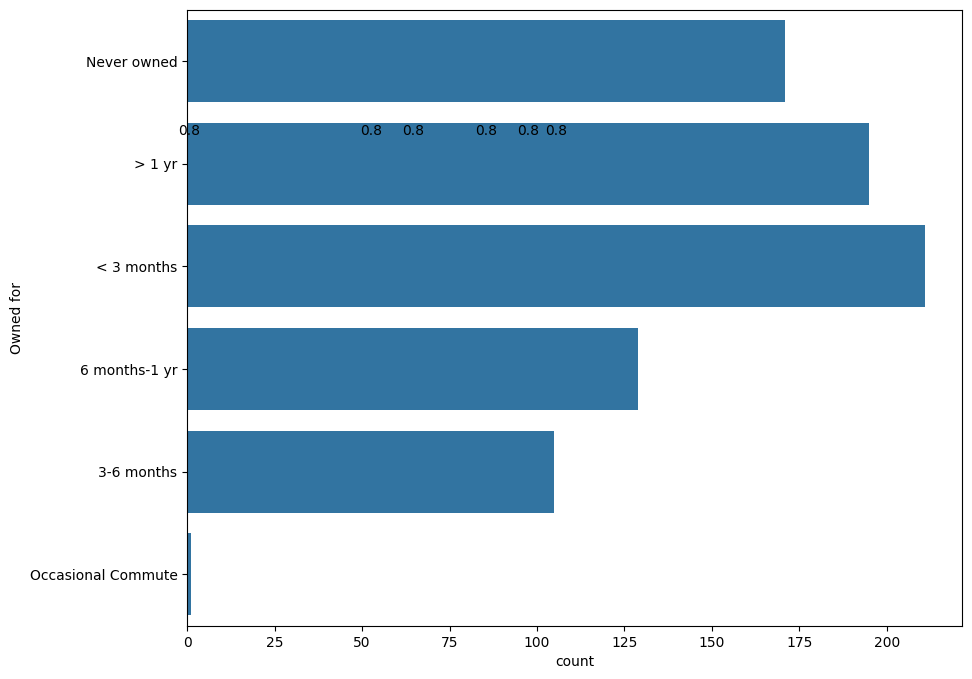

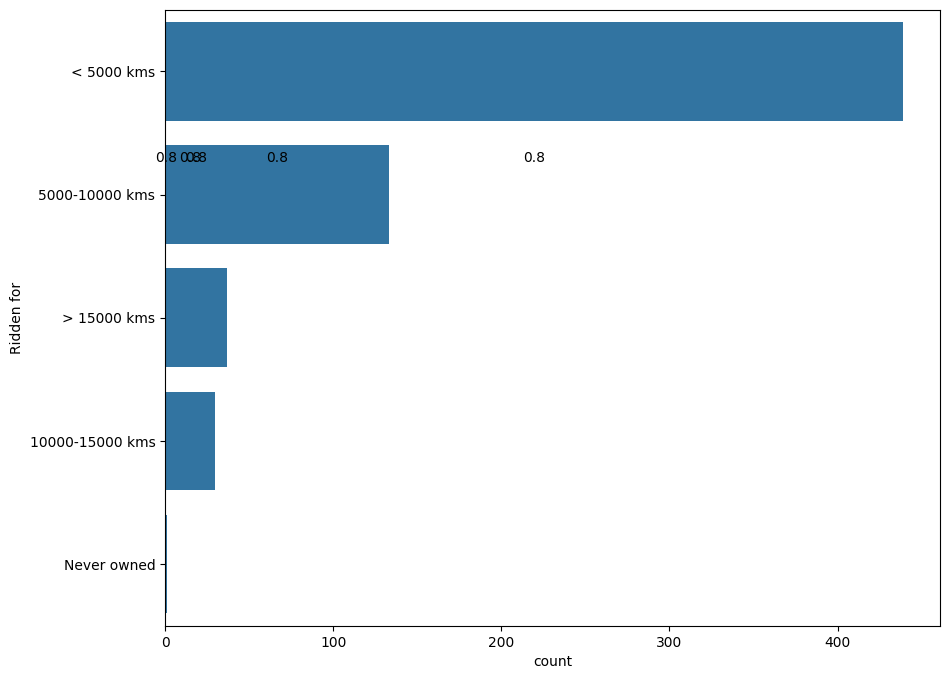

In [10]:
for col in df.columns[1:4].values:
    plt.figure(figsize=(10, 8))
    splot = sns.countplot(df[col])
    for p in splot.patches:
               splot.annotate(format(p.get_height(), '.1f'),
               (p.get_x() + p.get_width() / 2., p.get_height()),
               ha = 'center', va = 'center',
               xytext = (0, 9),
               textcoords = 'offset points')
    plt.show(block=False)

## Step 2: Specifying the Ideal Target Segment

<Axes: xlabel='count', ylabel='Owned for'>

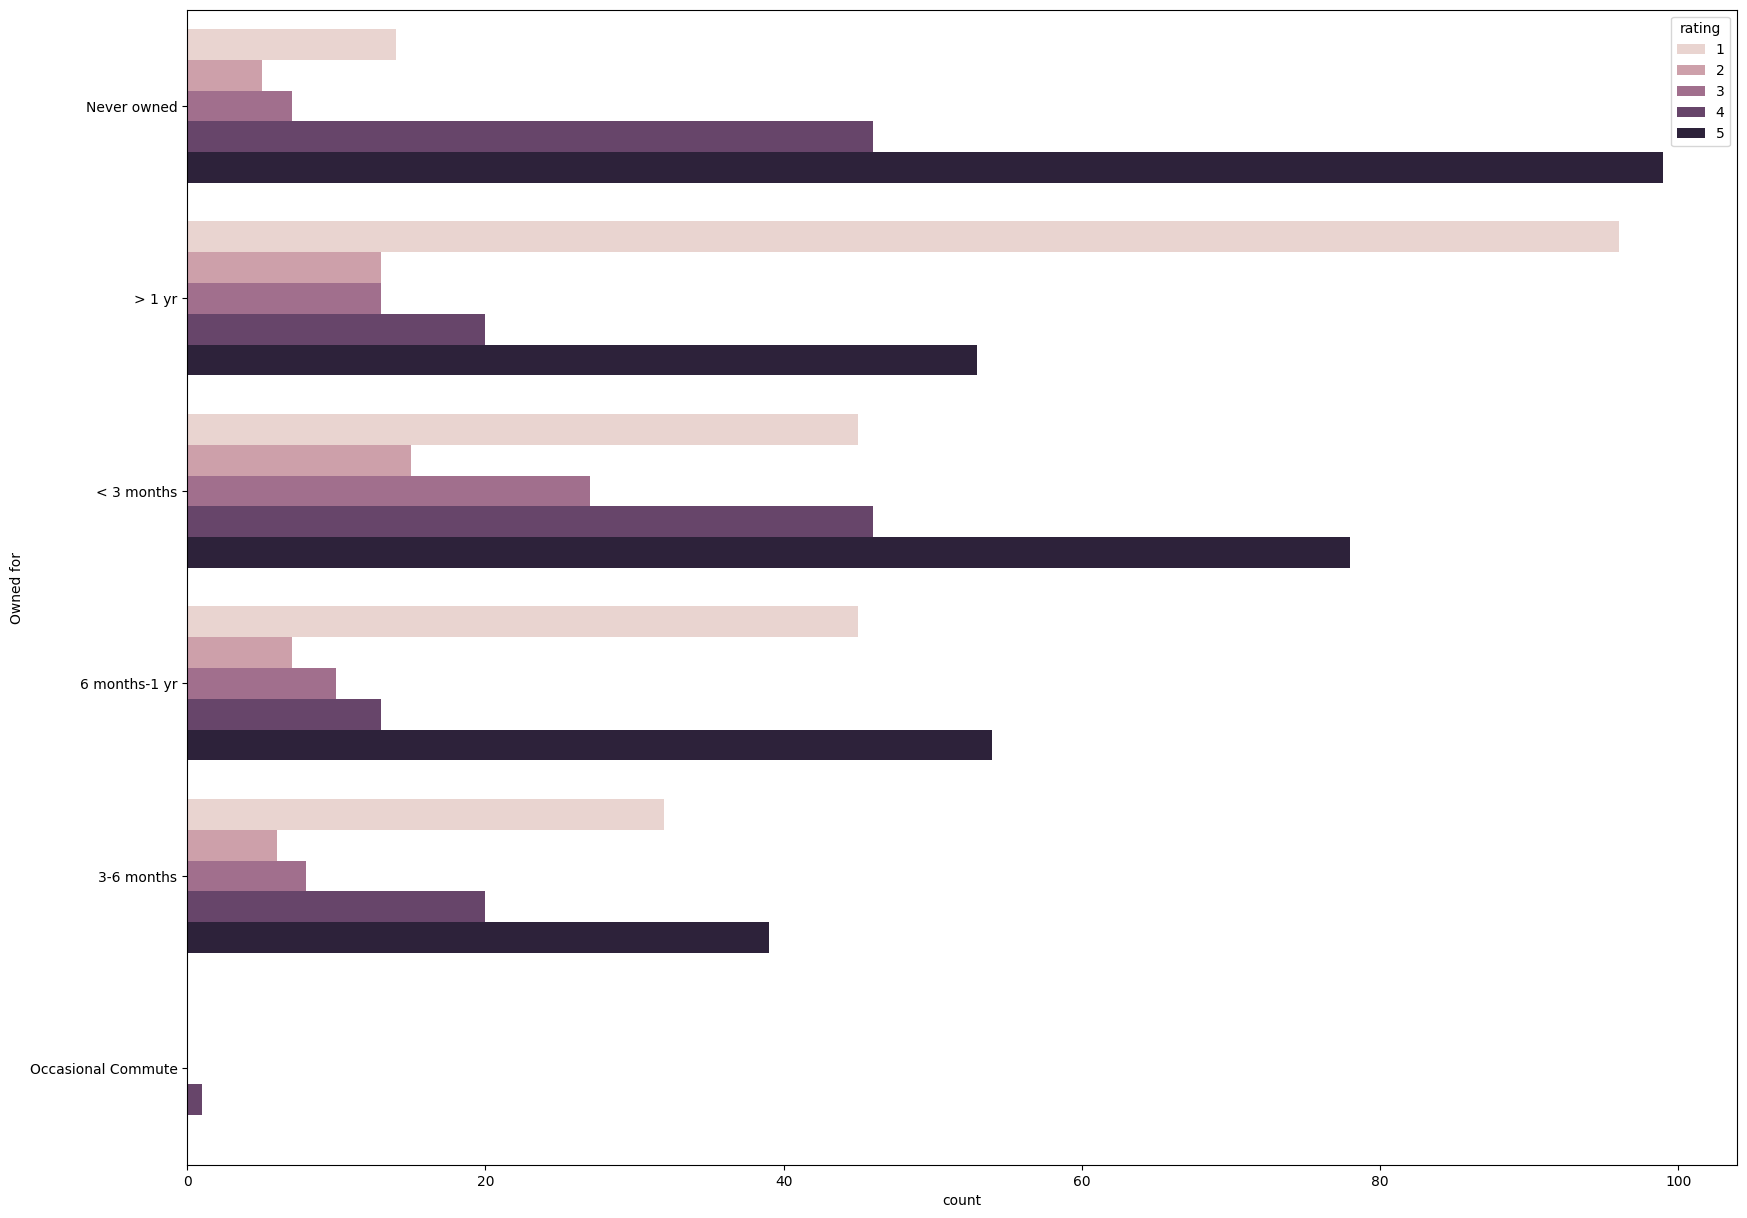

In [11]:
plt.figure(figsize=(20, 15))
sns.countplot(y ='Owned for', data = df, hue='rating')

<Axes: xlabel='count', ylabel='Used it for'>

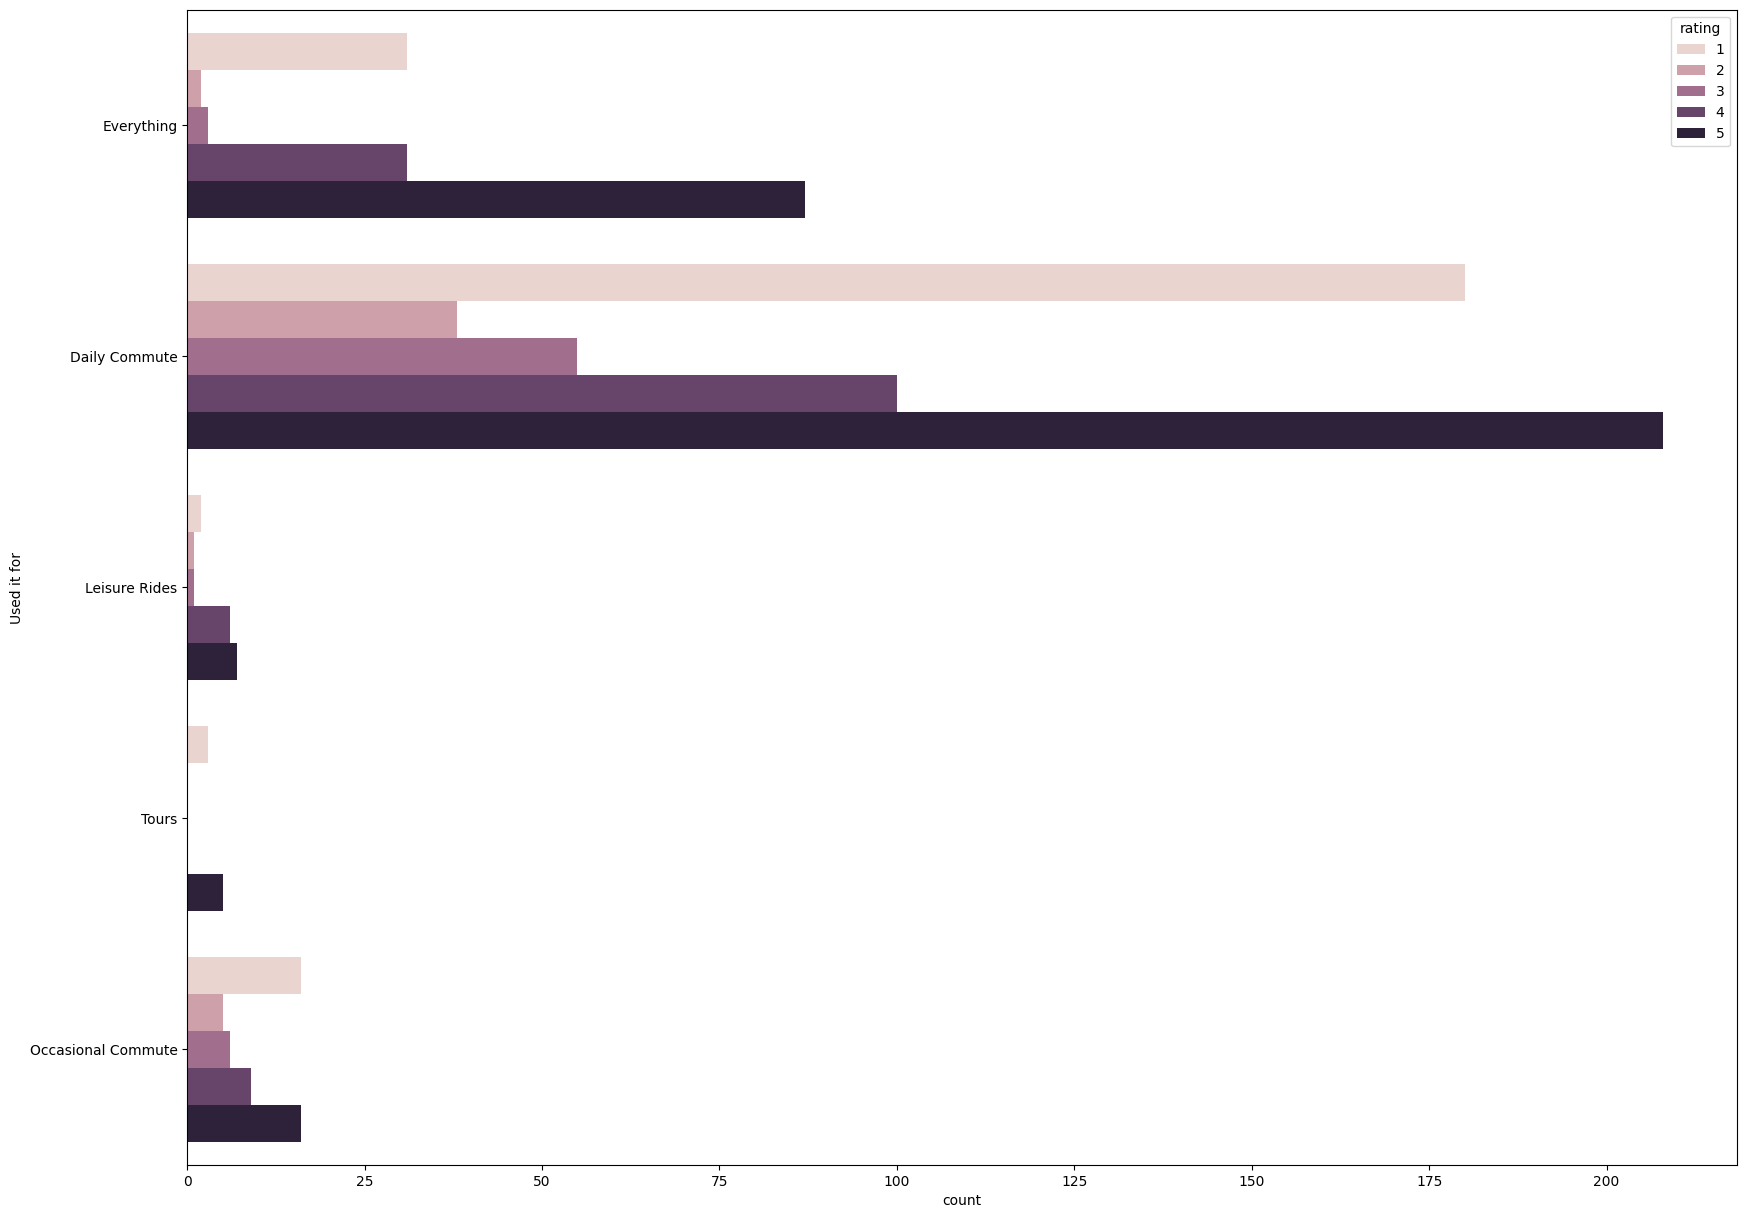

In [12]:
plt.figure(figsize=(20, 15))
sns.countplot(y ='Used it for', data = df, hue='rating')

<Axes: xlabel='count', ylabel='Ridden for'>

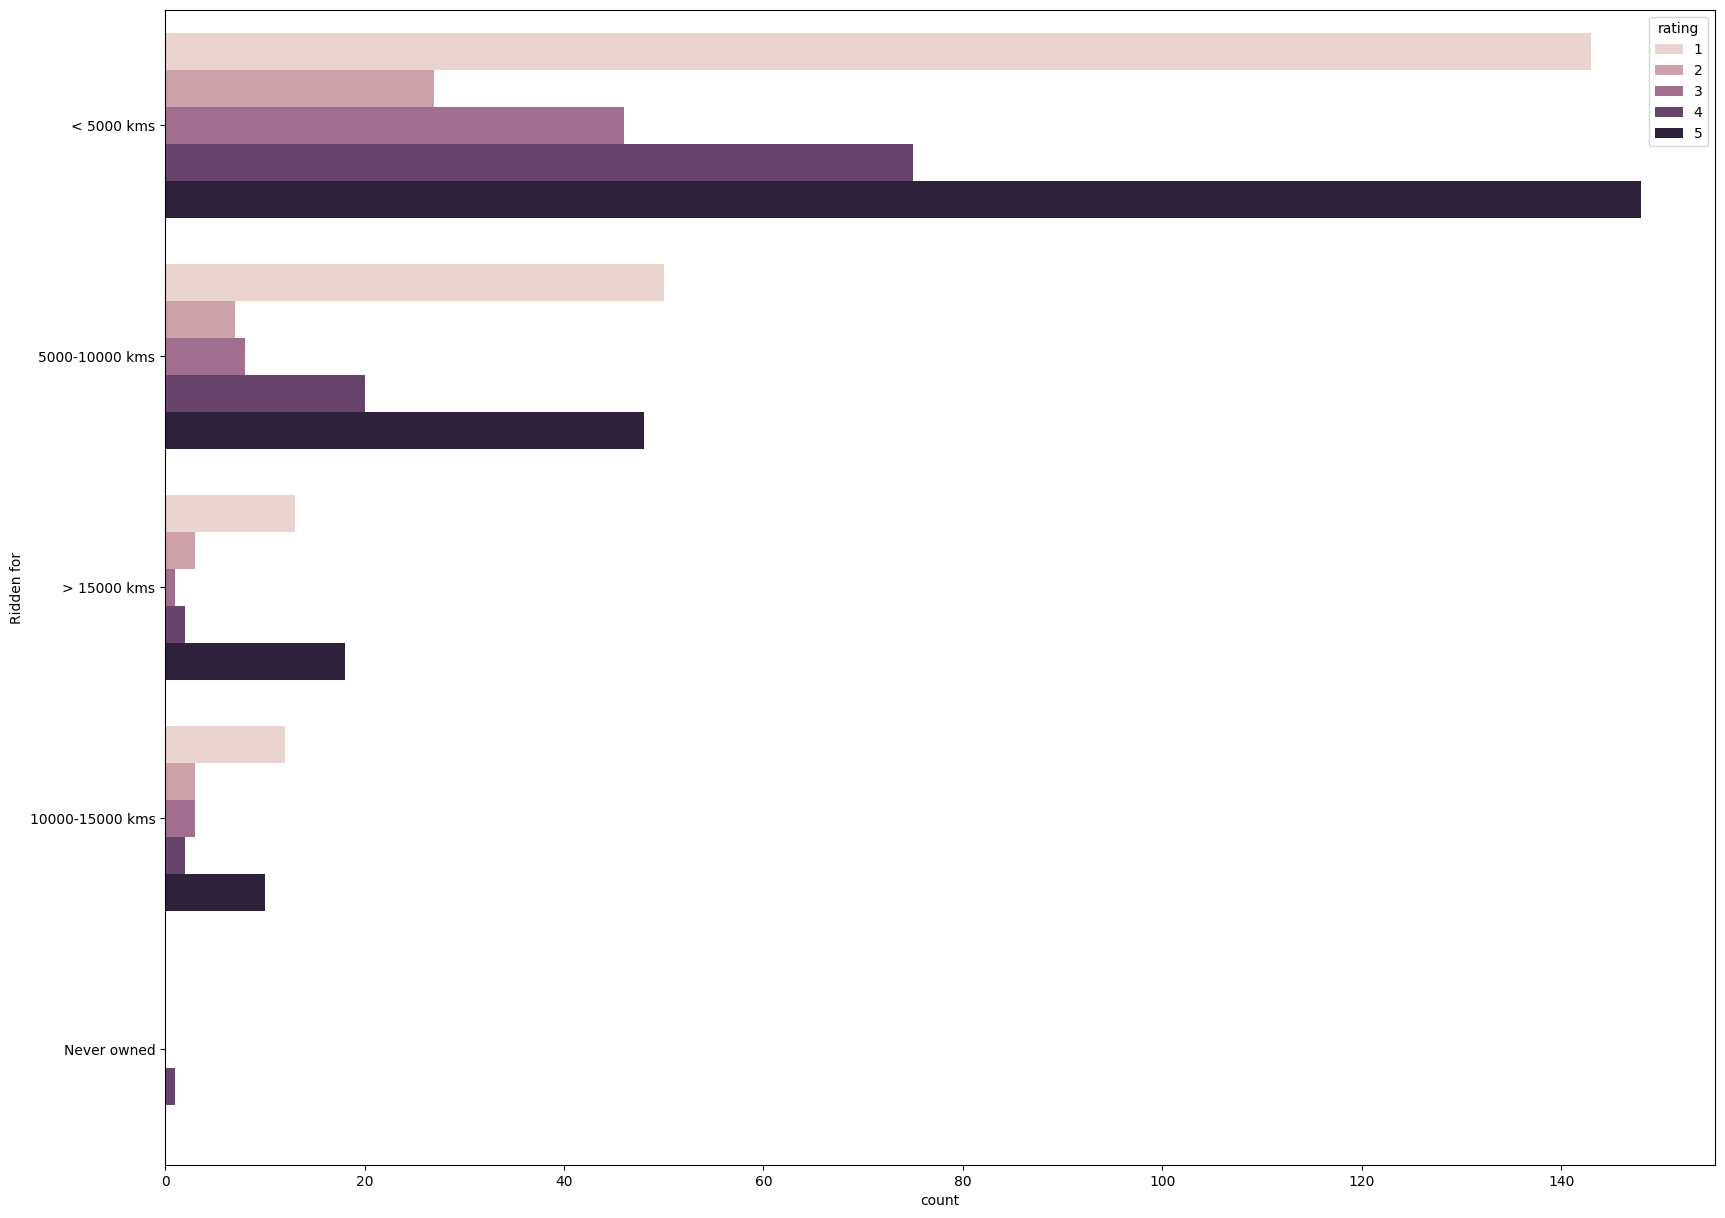

In [13]:
plt.figure(figsize=(20, 15))
sns.countplot(y ='Ridden for', data = df, hue='rating')

## Principal Component Analysis

In [14]:
columns = df.columns[5:].values
df[columns] = df[columns].fillna(0)

In [15]:
values = df[columns].values

In [16]:
pca = PCA()

pca.fit_transform(values)
std = pca.components_.std(axis=0)
cumsumProportions = pca.explained_variance_ratio_.cumsum()

for idx in range(len(columns)):
    print("column: {} \n Standard Deviation: {} \n Proportion of Variance: {} \n Cumulative Proportion: {} \n\n".
    format(columns[idx], std[idx], pca.explained_variance_ratio_[idx], cumsumProportions[idx]))

column: Visual Appeal 
 Standard Deviation: 0.29837102452024805 
 Proportion of Variance: 0.6008648041121971 
 Cumulative Proportion: 0.6008648041121971 


column: Reliability 
 Standard Deviation: 0.3407292782377704 
 Proportion of Variance: 0.16780600322565084 
 Cumulative Proportion: 0.768670807337848 


column: Performance 
 Standard Deviation: 0.31517055794829907 
 Proportion of Variance: 0.08934163599062014 
 Cumulative Proportion: 0.8580124433284682 


column: Service Experience 
 Standard Deviation: 0.3524222504806986 
 Proportion of Variance: 0.04648088670150185 
 Cumulative Proportion: 0.90449333002997 


column: Extra Features 
 Standard Deviation: 0.32371882188287787 
 Proportion of Variance: 0.03572647684428517 
 Cumulative Proportion: 0.9402198068742552 


column: Comfort 
 Standard Deviation: 0.3416506376118974 
 Proportion of Variance: 0.026101901223076714 
 Cumulative Proportion: 0.966321708097332 


column: Maintenance cost 
 Standard Deviation: 0.3507836648106827 
 P

* The following command returns the factor loadings.
* The loadings indicate how the original variables are combined to form principal components.
* Loadings guide the interpretation of principal components.

In [17]:
pd.DataFrame(pca.components_.T, columns=[f"PC{i+1}" for i in range(len(columns))], index=columns)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
Visual Appeal,-0.410174,0.243865,0.033703,0.363738,0.622361,0.338511,0.367611,-0.042255
Reliability,-0.454483,0.251169,0.077833,0.068836,-0.158638,-0.794431,0.251526,0.003318
Performance,-0.474074,-0.267590,-0.220919,0.395342,0.004436,-0.024995,-0.705527,0.011640
Service Experience,-0.453888,0.200143,0.201567,-0.084542,-0.668746,0.499364,0.096422,-0.016390
Extra Features,-0.433892,-0.431548,0.088360,-0.728165,0.290789,0.006431,0.021939,0.048900
Comfort,-0.070023,0.443526,-0.831408,-0.318545,0.006094,0.057177,-0.040882,0.026332
Maintenance cost,0.023357,0.452932,0.326666,-0.228237,0.178215,-0.031154,-0.426145,-0.648979
Value for Money,0.027036,0.421528,0.312431,-0.125404,0.154609,0.004459,-0.332834,0.757325


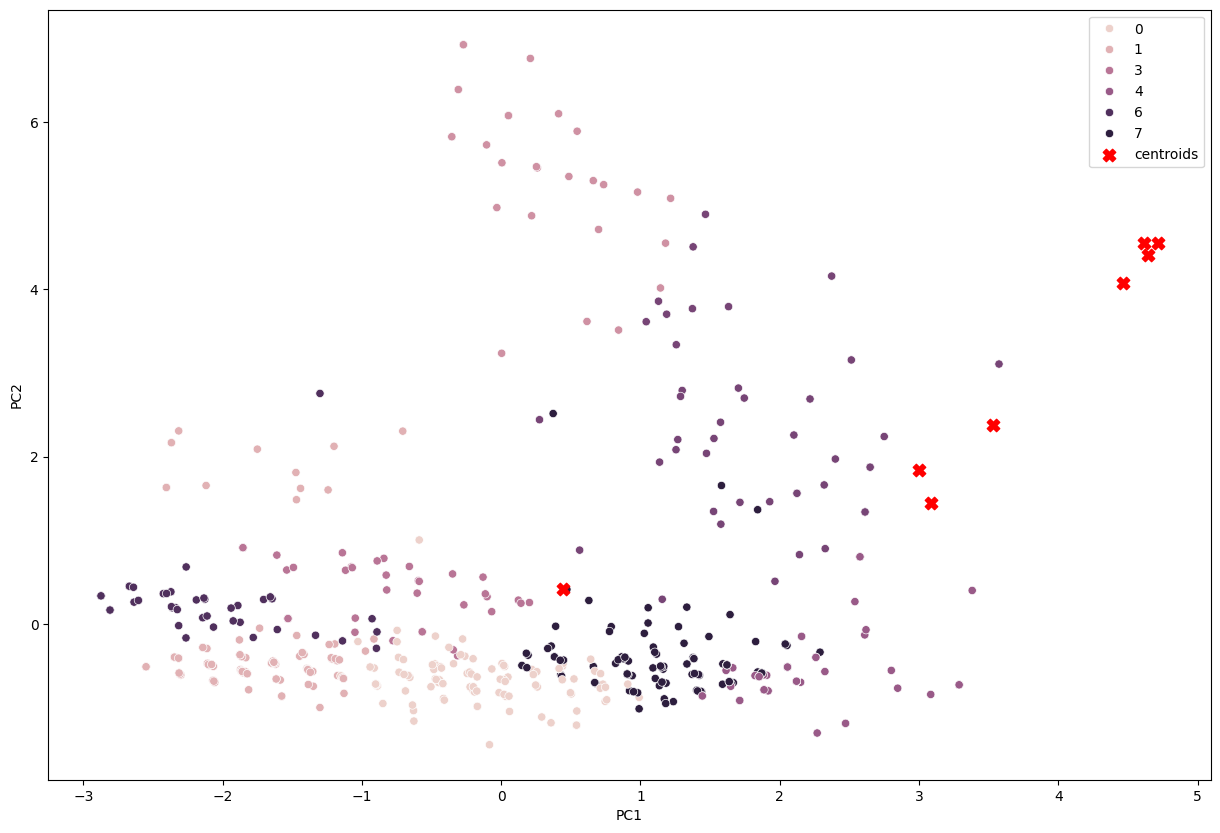

In [18]:
plt.figure(figsize=(15, 10))
kmeans = KMeans(8, random_state=0).fit(values)
scaled_data = StandardScaler().fit_transform(values)
pca = PCA(n_components=8)
pca_data = pca.fit_transform(scaled_data)

pf = pd.DataFrame(data=pca_data, columns=[f"PC{i+1}" for i in range(len(columns))])
sns.scatterplot(data=pf, x='PC1', y='PC2', hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='X', c="r", s=80, label='centroids')
plt.legend()
plt.show()

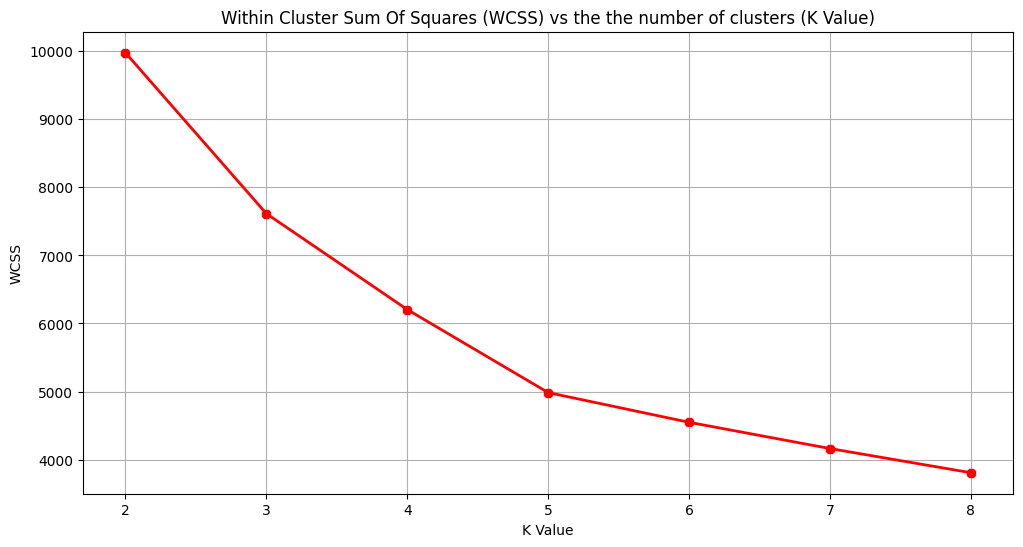

In [19]:
wcss = []
for k in range(2,9):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(values)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(2,9),wcss, linewidth=2, color="red", marker="8")
plt.xlabel("K Value")
plt.xticks(np.arange(2,9,1))
plt.title('Within Cluster Sum Of Squares (WCSS) vs the the number of clusters (K Value)')
plt.ylabel("WCSS")
plt.show()

* We clearly observe an elbow at k=3

## Silhouette Score

For n_clusters = 2 The average silhouette_score is : 0.4382798385117127
For n_clusters = 3 The average silhouette_score is : 0.47197983697315826
For n_clusters = 4 The average silhouette_score is : 0.44966426821874844
For n_clusters = 5 The average silhouette_score is : 0.4110356880565707
For n_clusters = 6 The average silhouette_score is : 0.3803659233066803
For n_clusters = 7 The average silhouette_score is : 0.38054950742527416
For n_clusters = 8 The average silhouette_score is : 0.3717438932186394


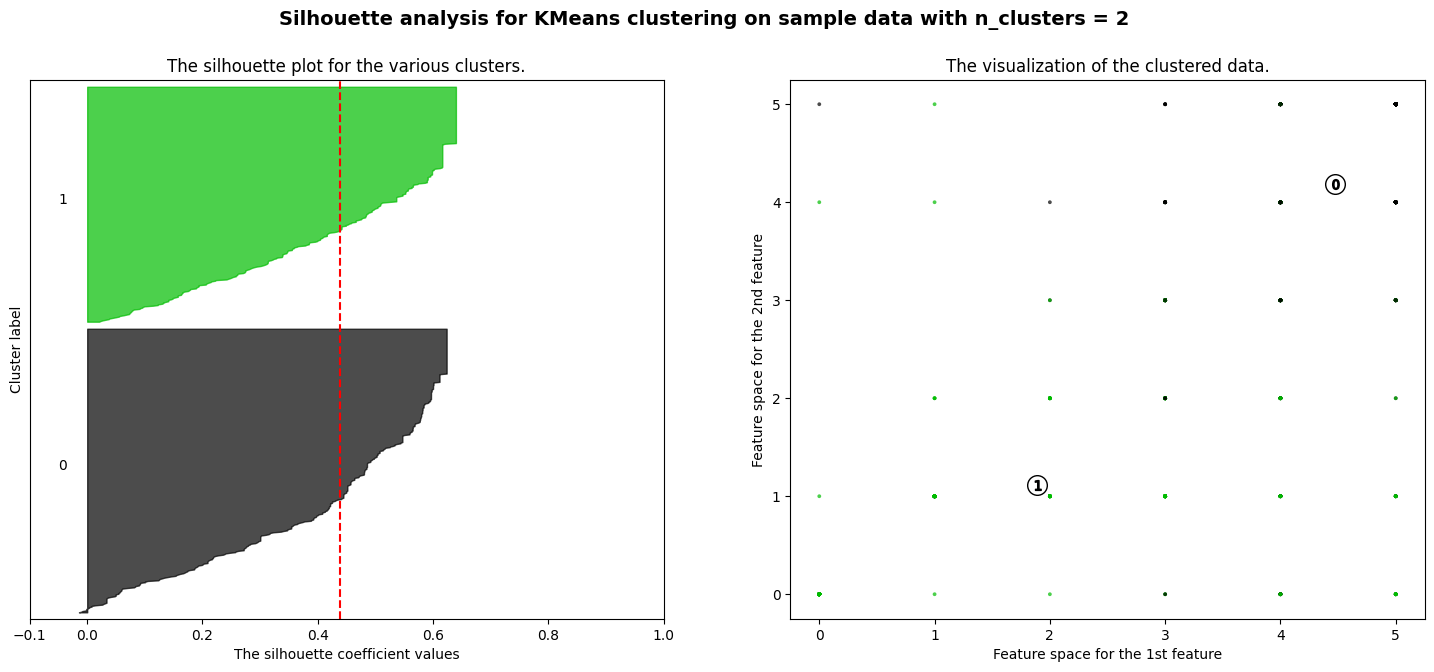

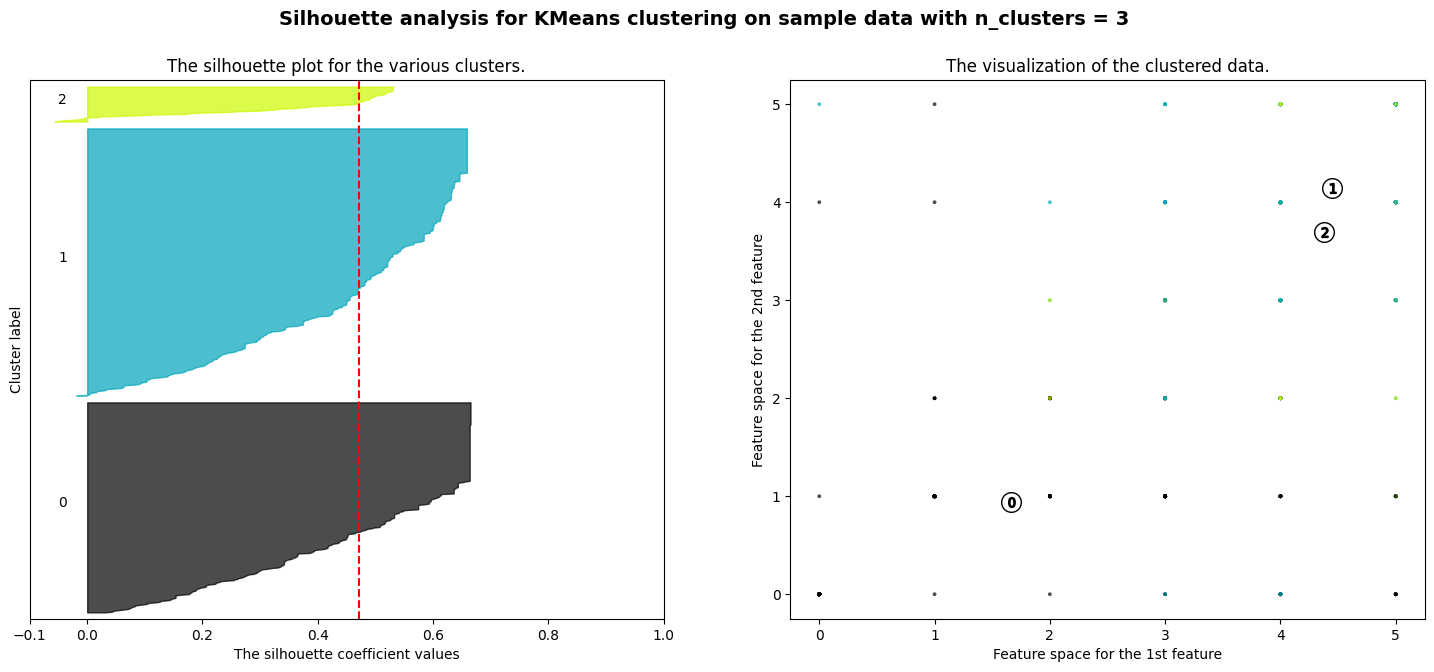

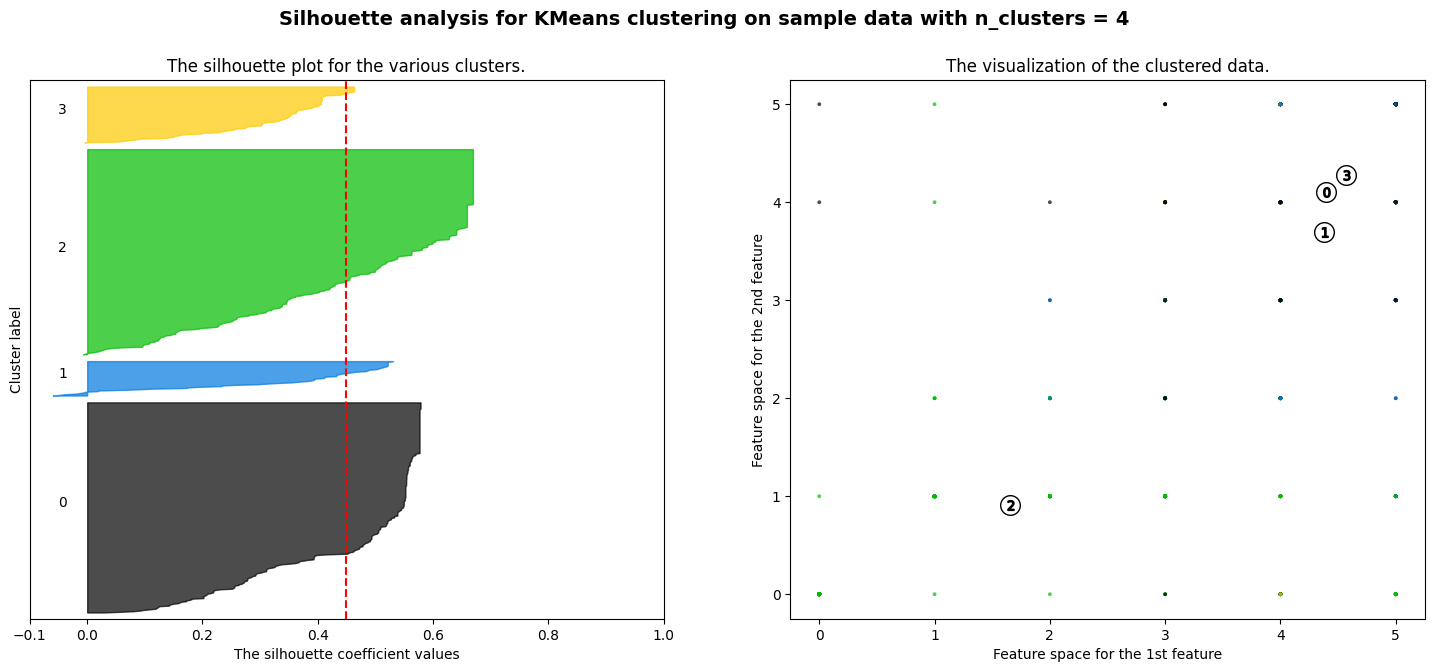

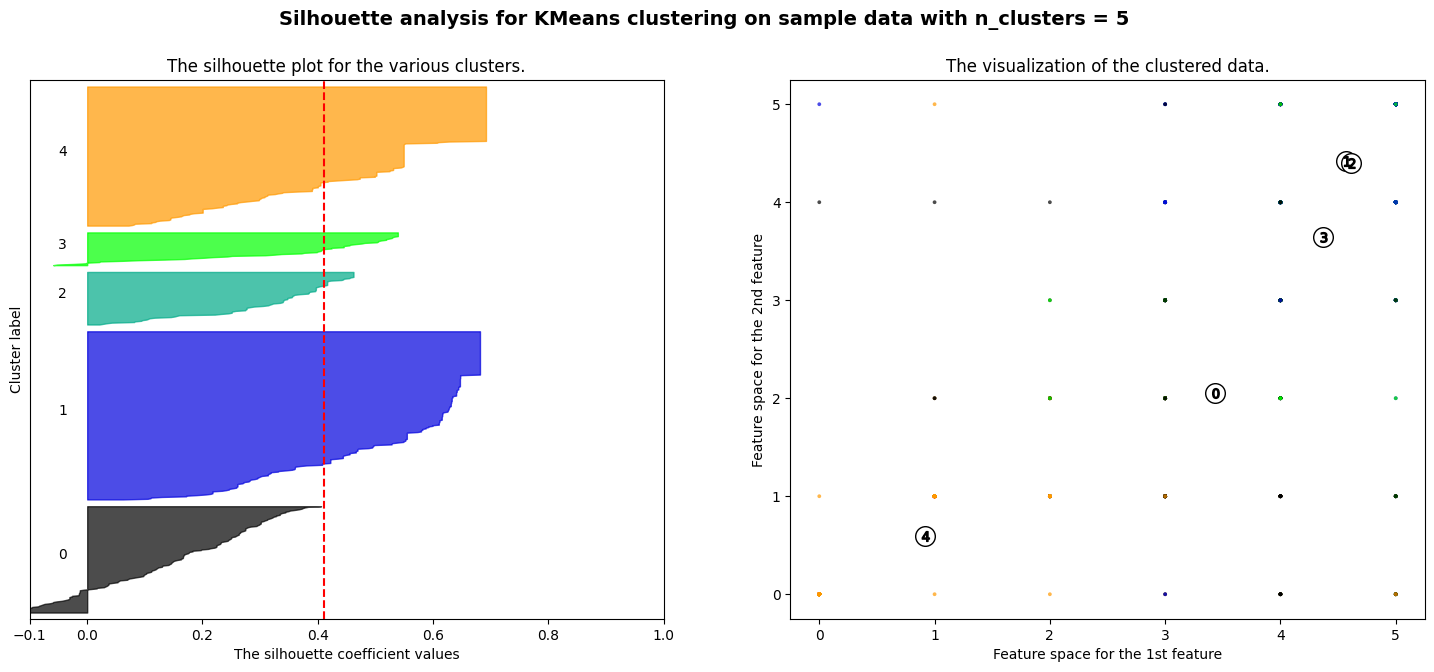

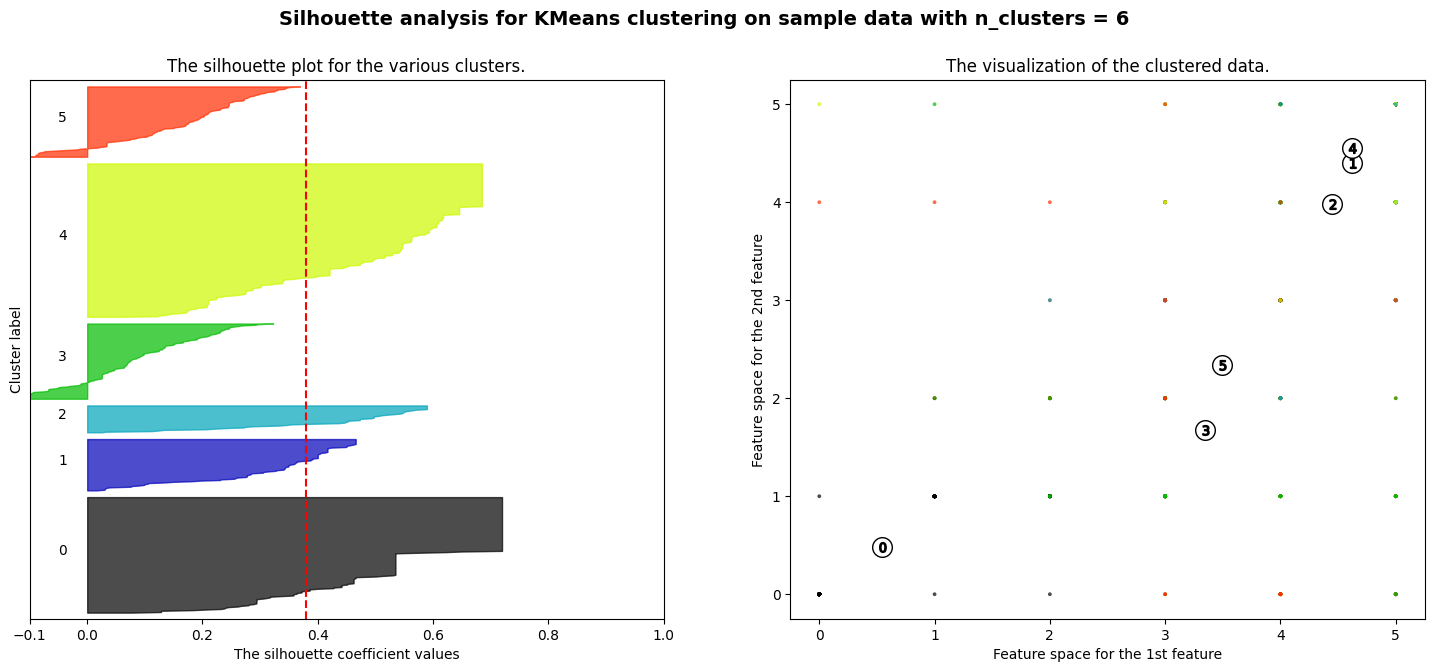

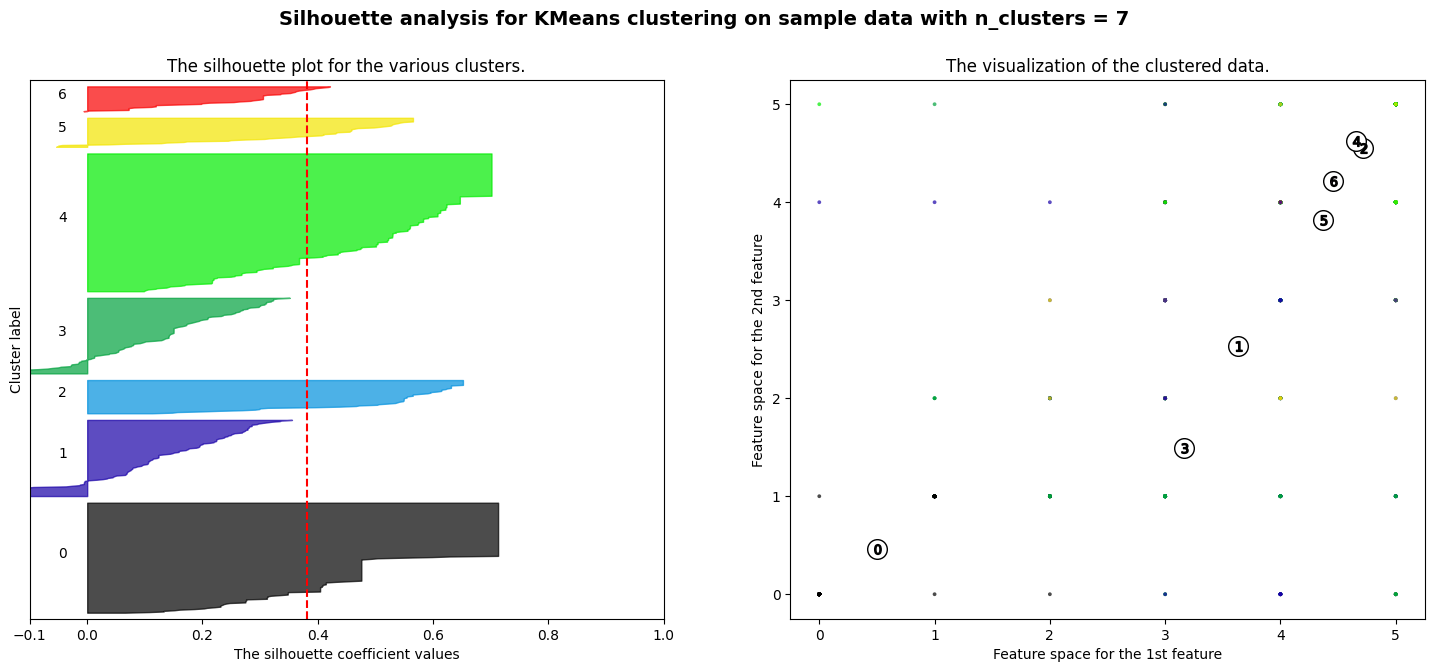

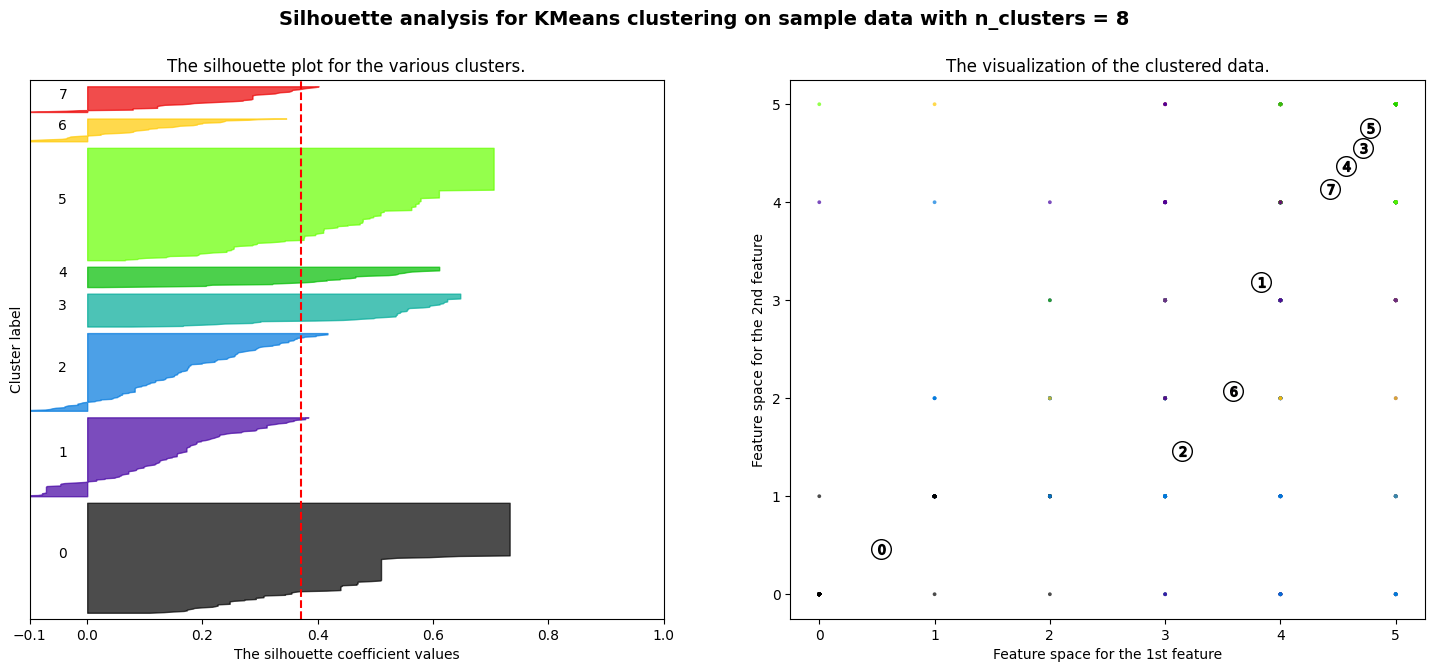

In [20]:
X = values

import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples, silhouette_score

range_n_clusters = np.arange(2, 9)

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

* Number of clusters given by silhouette plot is 5

In [21]:
rng = np.random.default_rng()

kmeans = KMeans(n_clusters=3)
X = rng.choice(values, 200, axis=0)
kmeans.fit(X)

KMeans(n_clusters=3)

* Global stability of k-means segmentation solutions for the fast food data set

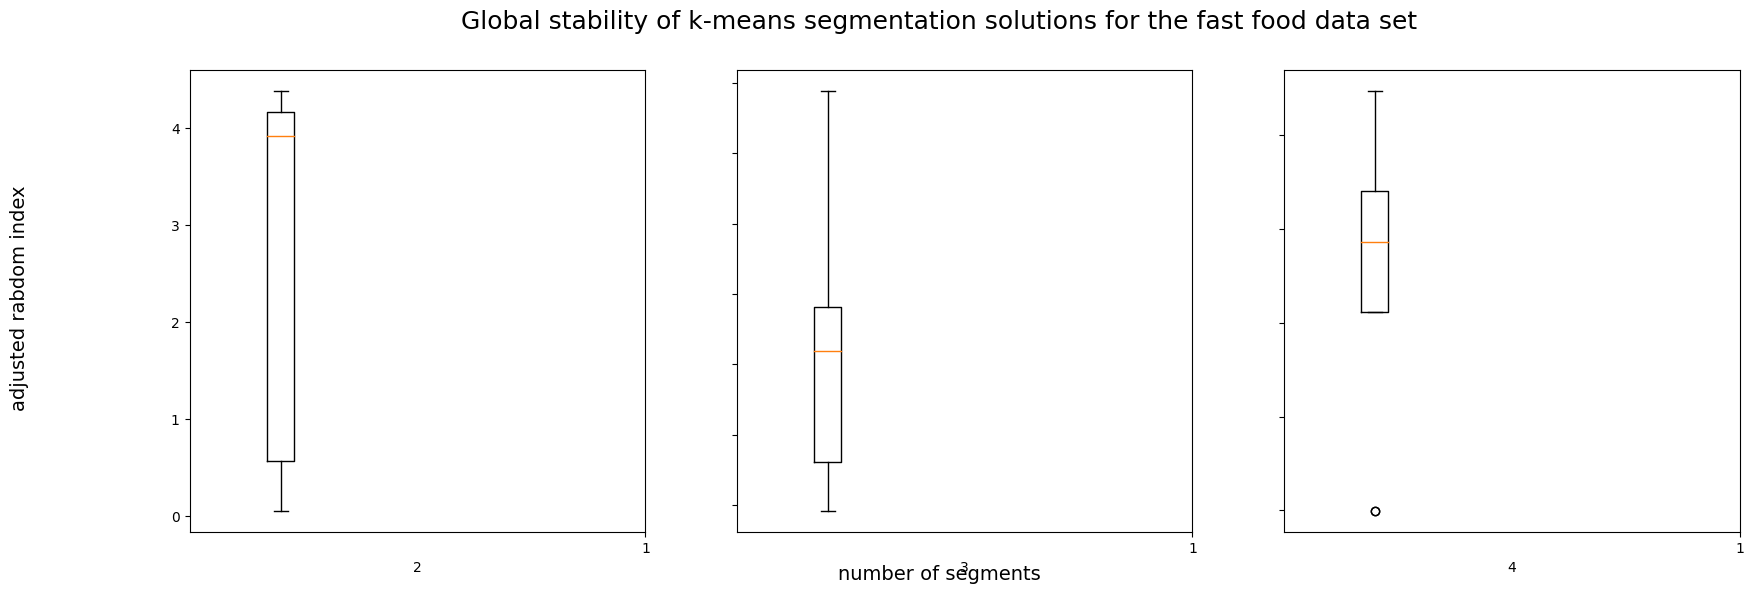

In [22]:
fig, axes = plt.subplots(1, 3, sharex=True, figsize=(20,6))

fig.suptitle('Global stability of k-means segmentation solutions for the fast food data set', fontsize=18)

i=0


for ax in axes.flatten():
    ax.boxplot(kmeans.cluster_centers_[i])
    i+=1
    ax.label_outer()
    ax.set_xticks([i])
    ax.set_xlabel(i+1)

fig.text(0.5, 0.04, 'number of segments', va='center', ha='center', fontsize=14)
fig.text(0.04, 0.5, 'adjusted rabdom index', va='center', ha='center', rotation='vertical', fontsize=14)

plt.show()

## Using Mixtures of Regression Models

In [23]:
target = df['rating'].values

In [24]:
from sklearn.mixture import GaussianMixture
bic = []
aic = []

for k in range(2, 9):
    model = GaussianMixture(n_components=k, init_params='random')
    data = np.append(values, target.reshape(-1,1), axis=1)
    model.fit(data)
    print("For K : {} \t convergence after: {} iterations \n \n".format(k, model.n_iter_))

    bic.append(model.bic(data))
    aic.append(model.aic(data))

For K : 2 	 convergence after: 10 iterations 
 

For K : 3 	 convergence after: 11 iterations 
 

For K : 4 	 convergence after: 17 iterations 
 

For K : 5 	 convergence after: 14 iterations 
 

For K : 6 	 convergence after: 14 iterations 
 

For K : 7 	 convergence after: 13 iterations 
 

For K : 8 	 convergence after: 19 iterations 
 



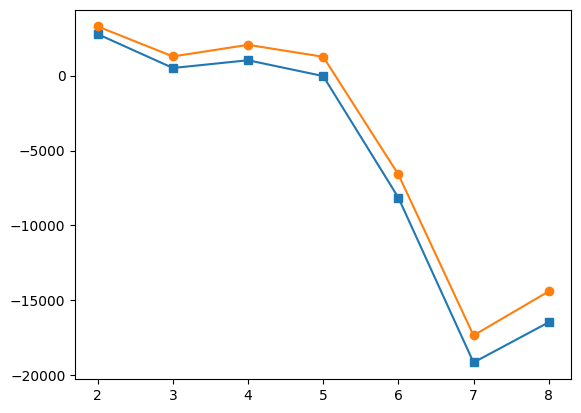

In [25]:
plt.plot(np.arange(2, 9), aic, marker = 's')
plt.plot(np.arange(2, 9), bic, marker = 'o')

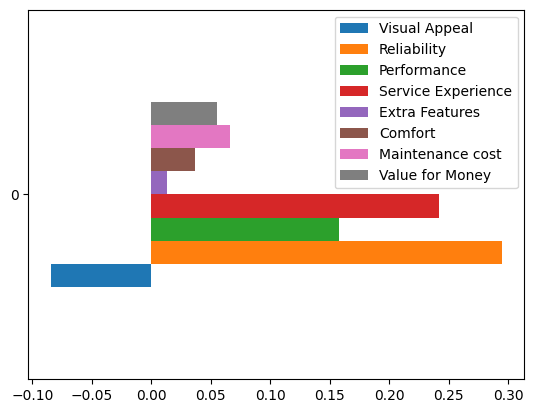

In [26]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(values, target)

pd.DataFrame(lr.coef_.reshape(1,-1), columns=columns).plot(y=columns, kind='barh')
plt.show()

## Step 6: Profiling Segments

If we draw a horizontal line that passes through longest distance without a horizontal line, we get 2 clusters as shown in the following figure:

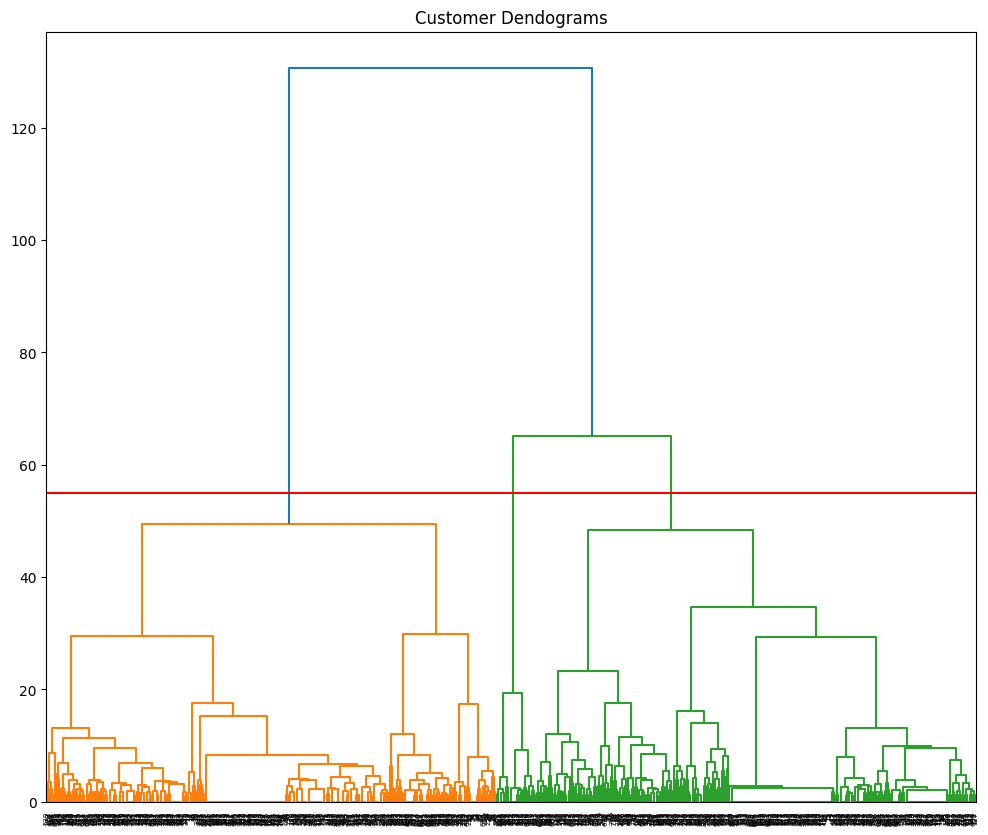

In [27]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(12, 10))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(values, method='ward'))
plt.axhline(y = 55, color = 'r', linestyle = '-')
plt.show()

* Number of clusters given by dendograms is 3